In [1]:
# Import packages
import os
import glob

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import rasterio
import xarray

import pandas as pd

In [2]:
# Define filepath
filepath = '/Users/jimwy/OneDrive/Documents/FutureOfCoffee/10yrdata/'

#xds = xarray.open_dataset(filepath + '*.nc', decode_coords='all')

# Define list of Landsat bands
files = sorted(glob.glob(filepath + '*mean_temperature*.nc'))
print(files)

['/Users/jimwy/OneDrive/Documents/FutureOfCoffee/10yrdata\\CRU_mean_temperature_mon_2.5x2.5_global_2009_v4.03.nc', '/Users/jimwy/OneDrive/Documents/FutureOfCoffee/10yrdata\\CRU_mean_temperature_mon_2.5x2.5_global_2010_v4.03.nc', '/Users/jimwy/OneDrive/Documents/FutureOfCoffee/10yrdata\\CRU_mean_temperature_mon_2.5x2.5_global_2011_v4.03.nc', '/Users/jimwy/OneDrive/Documents/FutureOfCoffee/10yrdata\\CRU_mean_temperature_mon_2.5x2.5_global_2012_v4.03.nc', '/Users/jimwy/OneDrive/Documents/FutureOfCoffee/10yrdata\\CRU_mean_temperature_mon_2.5x2.5_global_2013_v4.03.nc', '/Users/jimwy/OneDrive/Documents/FutureOfCoffee/10yrdata\\CRU_mean_temperature_mon_2.5x2.5_global_2014_v4.03.nc', '/Users/jimwy/OneDrive/Documents/FutureOfCoffee/10yrdata\\CRU_mean_temperature_mon_2.5x2.5_global_2015_v4.03.nc', '/Users/jimwy/OneDrive/Documents/FutureOfCoffee/10yrdata\\CRU_mean_temperature_mon_2.5x2.5_global_2016_v4.03.nc', '/Users/jimwy/OneDrive/Documents/FutureOfCoffee/10yrdata\\CRU_mean_temperature_mon_2.5x

In [4]:
import rasterio as rio
cclim = xarray.open_dataset(files[0], engine='rasterio') # , decode_times = False

In [5]:
cclim_lst = []

for i in range(0, len(files)):
    cclim_lst.append(xarray.open_dataset(files[i], engine='rasterio'))

In [6]:
cclim

<xarray.Dataset>
Dimensions:      (time: 12, x: 144, y: 72)
Coordinates:
  * time         (time) object 2009-01-01 00:00:00 ... 2009-12-01 00:00:00
  * x            (x) float64 -178.8 -176.2 -173.8 -171.2 ... 173.8 176.2 178.8
  * y            (y) float64 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
    spatial_ref  int32 ...
Data variables:
    tas          (time, y, x) float32 ...

In [7]:
t2mf = (cclim['t2m'] - 273.15) * 9/5 + 32

KeyError: 't2m'

In [ ]:
t2mf

In [ ]:
# Plot data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
im1 = ax1.imshow(t2m[0,:,:])#cclim['t2mf'][0,:,:])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

# Plot data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
im1 = ax1.imshow(cclim['tp'][0,:,:])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')



In [ ]:
cof_lat = [19.477585598288215, 15.951339161580043, 15.17355242498728, 4.622913389125596, 20.762395445023337, 21.325342888979133]
cof_long = [-96.97046892217435,-96.4635391253275,-92.33612361801524,-75.59423450228476, -104.85486555253753, -105.00863721756717]
#cof_names = [‘Veracruz’,‘Oaxaca’,‘Chiapas’,‘Columbia’,‘Jalisco’,‘Nayarit’]

#Oaxaca_point = cclim.sel(latitude=15.951339161580043, longitude=-96.4635391253275, method='nearest')

# Next, find the index of the grid point nearest a specific lat/lon.  

cof_farms = cclim.sel(latitude = ('cof_lat'), longitude = ("cof_long") ,method='nearest')






In [ ]:
veracruz_point = cclim.sel(latitude=19.477585598288215, longitude=-96.97046892217435, method='nearest')

oaxaca_point = cclim.sel(latitude=15.951339161580043, longitude=-96.4635391253275, method='nearest')

chiapas_point = cclim.sel(latitude=15.17355242498728, longitude=-92.33612361801524, method='nearest')

colombia_point = cclim.sel(latitude=4.622913389125596, longitude=-75.59423450228476, method='nearest')

jalisco_point = cclim.sel(latitude=20.762395445023337, longitude=-104.85486555253753, method='nearest')

nayarit_point = cclim.sel(latitude=21.325342888979133, longitude=-105.00863721756717, method='nearest')



In [ ]:
print(oaxaca_point['t2m'].mean)

print(veracruz_point['t2m'].mean)

In [ ]:
Oax_3yr_mean = np.array([[292.26498, 293.01172, 294.04117, 294.52676, 294.90442, 294.9767 ,
       294.19534, 294.19232, 294.08435, 293.8182 , 293.59222, 292.57785,
       293.10913, 293.63843, 294.47507, 295.3232 , 295.04904, 294.4871 ,
       294.20038, 294.11047, 294.13156, 293.76248, 293.31653, 291.69553,
       292.09125, 292.12286, 293.47723, 294.5293 , 294.6212 , 293.62286,
       294.47705, 293.97186, 293.84433, 293.93973, 292.19168, 292.21326]])

np.mean((Oax_3yr_mean)- 273.15) * 9/5 + 32

In [ ]:
Oax_3yr_mean

In [ ]:
from numpy import c_

import numpy as np
import matplotlib.pyplot as plt
import random

n = 100000

x = np.random.standard_normal(n)
y = 3.0 * x + 2.0 * np.random.standard_normal(n)
x, y = np.loadtxt("Oaxaca3yr.txt",unpack=True)

plt.hist2d(x,y)

plt.title("Oaxaca 3 yr temp histogram")

plt.savefig("histogram_2d_01.png", bbox_inches='tight')

plt.close()

In [ ]:
len(Oax_3yr_mean)

In [8]:
Oax_3yr_mean = np.array([292.26498, 293.01172, 294.04117, 294.52676, 294.90442, 294.9767 ,
       294.19534, 294.19232, 294.08435, 293.8182 , 293.59222, 292.57785,
       293.10913, 293.63843, 294.47507, 295.3232 , 295.04904, 294.4871 ,
       294.20038, 294.11047, 294.13156, 293.76248, 293.31653, 291.69553,
       292.09125, 292.12286, 293.47723, 294.5293 , 294.6212 , 293.62286,
       294.47705, 293.97186, 293.84433, 293.93973, 292.19168, 292.21326])

np.mean((Oax_3yr_mean)- 273.15) * 9/5 + 32

69.05937800000004

In [9]:
test_df = pd.DataFrame({"a": Oax_3yr_mean, "b": range(0, len(Oax_3yr_mean))})

In [10]:
test_df

,a,b
0,292.26498,0
1,293.01172,1
2,294.04117,2
3,294.52676,3
4,294.90442,4
5,294.97670,5
6,294.19534,6
7,294.19232,7
8,294.08435,8
9,293.81820,9


<AxesSubplot:>

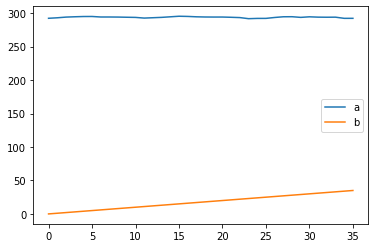

In [12]:
test_df.iloc[:,].plot()